# DL Assignment #2

> ✨
> 
> `🥝Name` 
> - Chenrui Fan
> 
> `🍉Student ID` 
> - 23-125-818
> 
> `🍑Github`
> - https://github.com/Sosekie/DL_Assignment
> 
> ✨

## Loss Curves

In [1]:
!pip install matplotlib

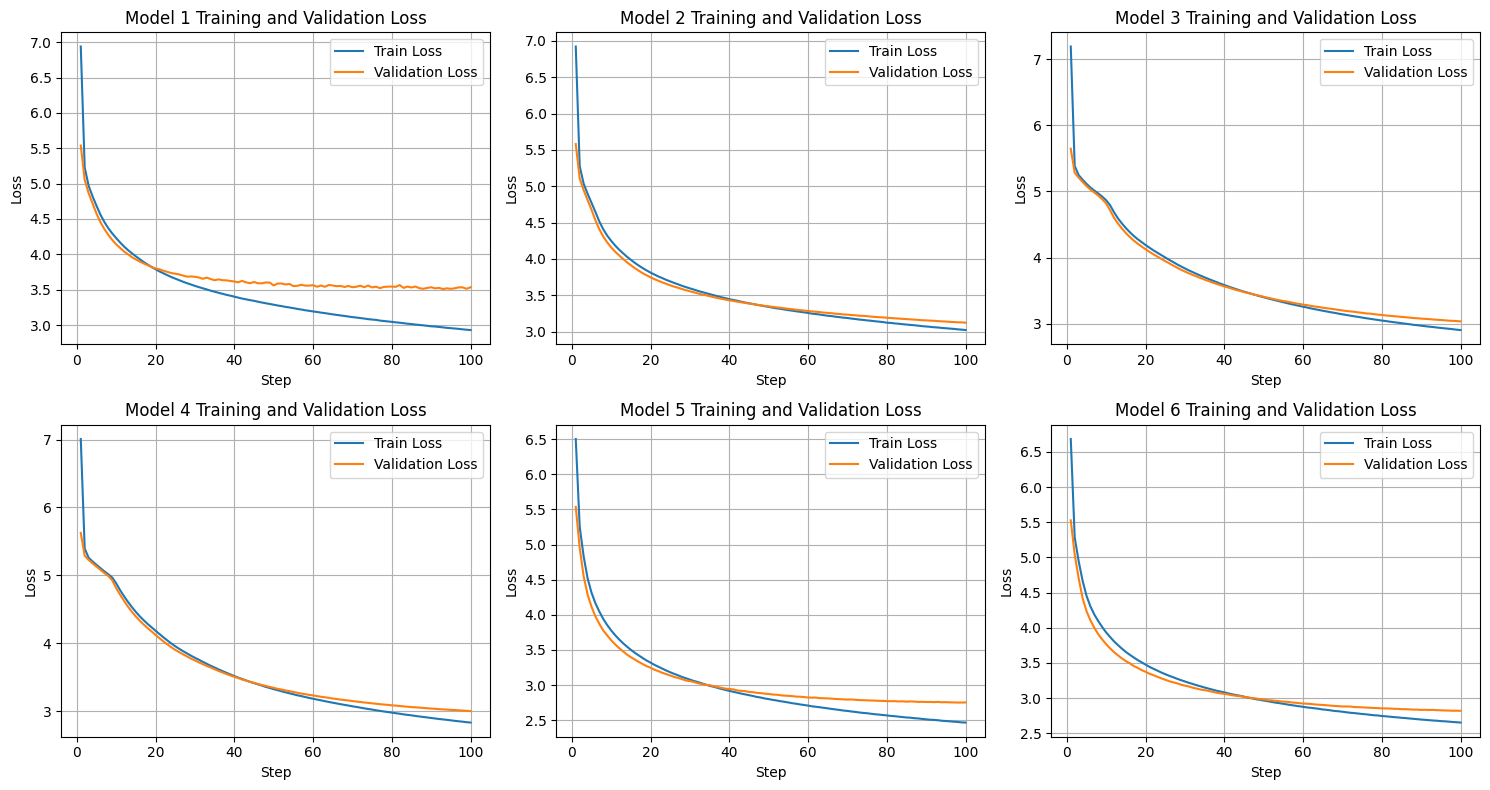

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

path = 'report_utils/loss/'
files = [
    (path+'model_1_train_loss.csv', path+'model_1_val_loss.csv'),
    (path+'model_2_train_loss.csv', path+'model_2_val_loss.csv'),
    (path+'model_3_train_loss.csv', path+'model_3_val_loss.csv'),
    (path+'model_4_train_loss.csv', path+'model_4_val_loss.csv'),
    (path+'model_5_train_loss.csv', path+'model_5_val_loss.csv'),
    (path+'model_6_train_loss.csv', path+'model_6_val_loss.csv')
]
num_models = len(files)
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
axs = axs.flatten()
for i, (train_file, val_file) in enumerate(files):
    train_data = pd.read_csv(train_file)
    val_data = pd.read_csv(val_file)
    axs[i].plot(train_data['Step'], train_data.iloc[:, 1], label='Train Loss')
    axs[i].plot(val_data['Step'], val_data.iloc[:, 1], label='Validation Loss')
    axs[i].set_title(f'Model {i+1} Training and Validation Loss')
    axs[i].set_xlabel('Step')
    axs[i].set_ylabel('Loss')
    axs[i].legend()
    axs[i].grid(True)
plt.tight_layout()
plt.show()

### Model 1
- Train Loss: Starts high and steadily decreases, showing a smooth convergence.
- Validation Loss: Initially follows the train loss but starts to plateau and becomes more stable after about 20 steps. This could indicate that the model is starting to overfit, as the validation loss does not decrease as much as the training loss.

### Model 2
- Train Loss: Similar pattern to Model 1, with a high initial loss that decreases steadily.
- Validation Loss: Decreases in a manner similar to the train loss, suggesting good generalization performance with minimal overfitting.

### Model 3
- Train Loss: Follows the typical pattern of decreasing steadily.
- Validation Loss: Shows a very similar trend to the training loss, indicating good generalization and effective training.

### Model 4
- Train Loss: Starts high and decreases consistently.
- Validation Loss: Decreases similarly to the training loss, indicating effective training and generalization.

### Model 5
- Train Loss: Steady decrease over the steps.
- Validation Loss: Very close to the training loss curve, indicating good generalization and minimal overfitting.

### Model 6
- Train Loss: Steady decrease, typical of effective training.
- Validation Loss: Mirrors the training loss closely, indicating good model performance and generalization.

### General Observations
- Convergence: All models show a steady decrease in training loss.
- Overfitting: Model 1 shows some signs of overfitting, where the validation loss does not decrease as much as the training loss after initial steps. The other models generally show good generalization with validation losses that follow the training losses closely(In fact I control the layer of model 5 and 6 so it did not appear overfitting, but if you set it with embedding_dim: 1024 and num_layers: 12, the overfitting is very serious).
- Generalization: Models 2 through 6 show excellent generalization, as indicated by the close alignment of training and validation loss curves.

## BLEU Scores

In [3]:
!pip install tabulate

In [4]:
import os

# Define the base directory
base_dir = 'report_utils/model_config'

folders = [
    'model_1',
    'model_2',
    'model_3',
    'model_4_CLS_as_LSTM_initial_status',
    'model_4_CLS_condition_at_every_step',
    'model_5_128_4',
    'model_5_768_6',
    'model_6_128_2_8',
    'model_6_128_4_8',
    'model_6_1024_12_16'
]

bleu_scores = {
    'Folder': [],
    'BLEU_1': [],
    'BLEU_2': [],
    'BLEU_3': [],
    'BLEU_4': []
}

def read_bleu_scores(file_path):
    scores = {}
    with open(file_path, 'r') as file:
        for line in file:
            key, value = line.strip().split()
            scores[key] = float(value)
    return scores

for folder in folders:
    folder_path = os.path.join(base_dir, folder)
    bleu_file_path = os.path.join(folder_path, 'bleu_scores.txt')
    if os.path.exists(bleu_file_path):
        scores = read_bleu_scores(bleu_file_path)
        bleu_scores['Folder'].append(folder)
        bleu_scores['BLEU_1'].append(scores.get('BLEU_1', 0))
        bleu_scores['BLEU_2'].append(scores.get('BLEU_2', 0))
        bleu_scores['BLEU_3'].append(scores.get('BLEU_3', 0))
        bleu_scores['BLEU_4'].append(scores.get('BLEU_4', 0))

bleu_df = pd.DataFrame(bleu_scores)

bleu_df['Total_BLEU'] = bleu_df[['BLEU_1', 'BLEU_2', 'BLEU_3', 'BLEU_4']].sum(axis=1)

# Sort the DataFrame by the sum of BLEU scores from low to high
bleu_df = bleu_df.sort_values(by='Total_BLEU')

markdown_table = bleu_df.drop(columns=['Total_BLEU']).to_markdown(index=False)
print(markdown_table)

| Folder                              |   BLEU_1 |   BLEU_2 |   BLEU_3 |    BLEU_4 |
|:------------------------------------|---------:|---------:|---------:|----------:|
| model_1                             | 0.36762  | 0.205748 | 0.113201 | 0.0679565 |
| model_2                             | 0.451024 | 0.300598 | 0.195124 | 0.129829  |
| model_4_CLS_as_LSTM_initial_status  | 0.460823 | 0.33431  | 0.225528 | 0.150814  |
| model_6_1024_12_16                  | 0.576488 | 0.395391 | 0.264107 | 0.17407   |
| model_4_CLS_condition_at_every_step | 0.563091 | 0.398896 | 0.270831 | 0.182383  |
| model_3                             | 0.580789 | 0.399676 | 0.267815 | 0.179336  |
| model_5_768_6                       | 0.591073 | 0.409906 | 0.277181 | 0.187984  |
| model_5_128_4                       | 0.625602 | 0.449833 | 0.315142 | 0.216235  |
| model_6_128_4_8                     | 0.626087 | 0.450436 | 0.31605  | 0.217717  |
| model_6_128_2_8                     | 0.633044 | 0.458154 | 0.3

### Experiment Setup:

- model_1, model_2, model_3 are the same as requirements.

- model_4_CLS_as_LSTM_initial_status: Using encoded_image as the initial hidden status of LSTM. This did not perform very well.

- model_4_CLS_condition_at_every_step: In each step, encoded_image is concatenate with word embedding, as input of each step of LSTM.

- model_5_768_6: TransformerEncoder with embedding_dim=768 and num_layers=6, leading to overfitting.

- model_5_128_4: TransformerEncoder with embedding_dim=128 and num_layers=4, performance nice.

- model_6_1024_12_16: TransformerDecoder with  embedding_dim=1024, num_layers=12 and multihead=16, very bad overfitting.

- model_6_128_4_8: TransformerDecoder with  embedding_dim=128, num_layers=4 and multihead=8.

- model_6_128_2_8: TransformerDecoder with  embedding_dim=128, num_layers=2 and multihead=8, nice.

### Analysis:

> There is a noticeable correlation between the BLEU scores and the behavior of the loss curves:
> 
> - Models with higher BLEU scores tend to have training and validation loss curves that follow each other closely, indicating effective training and good generalization.
> 
> - Models with lower BLEU scores, like Model 1, exhibit some signs of overfitting where the validation loss plateaus while the training loss continues to decrease.
> 
> The BLEU scores and the loss curves together provide a comprehensive view of the model's performance, where the BLEU scores validate the qualitative results seen in the loss curves. Effective training, as indicated by closely aligned loss curves, corresponds to higher BLEU scores, reflecting better model performance on the validation set.

## Captions Generation

In [ ]:
# generate caption, result already in report_utils/generate_caption, you don't need to run this.
Best_models = [
    'model_1',
    'model_2',
    'model_3',
    'model_4',
    'model_5_128_4',
    'model_6_128_2_8'
]

for i in range(len(Best_models)):
    ! python report_utils/test.py --device-id=0 --config-file-path=./configs/config_model_{i+1}.yaml \
    --experiment-name={Best_models[i]} --num-epochs=1 --no-log

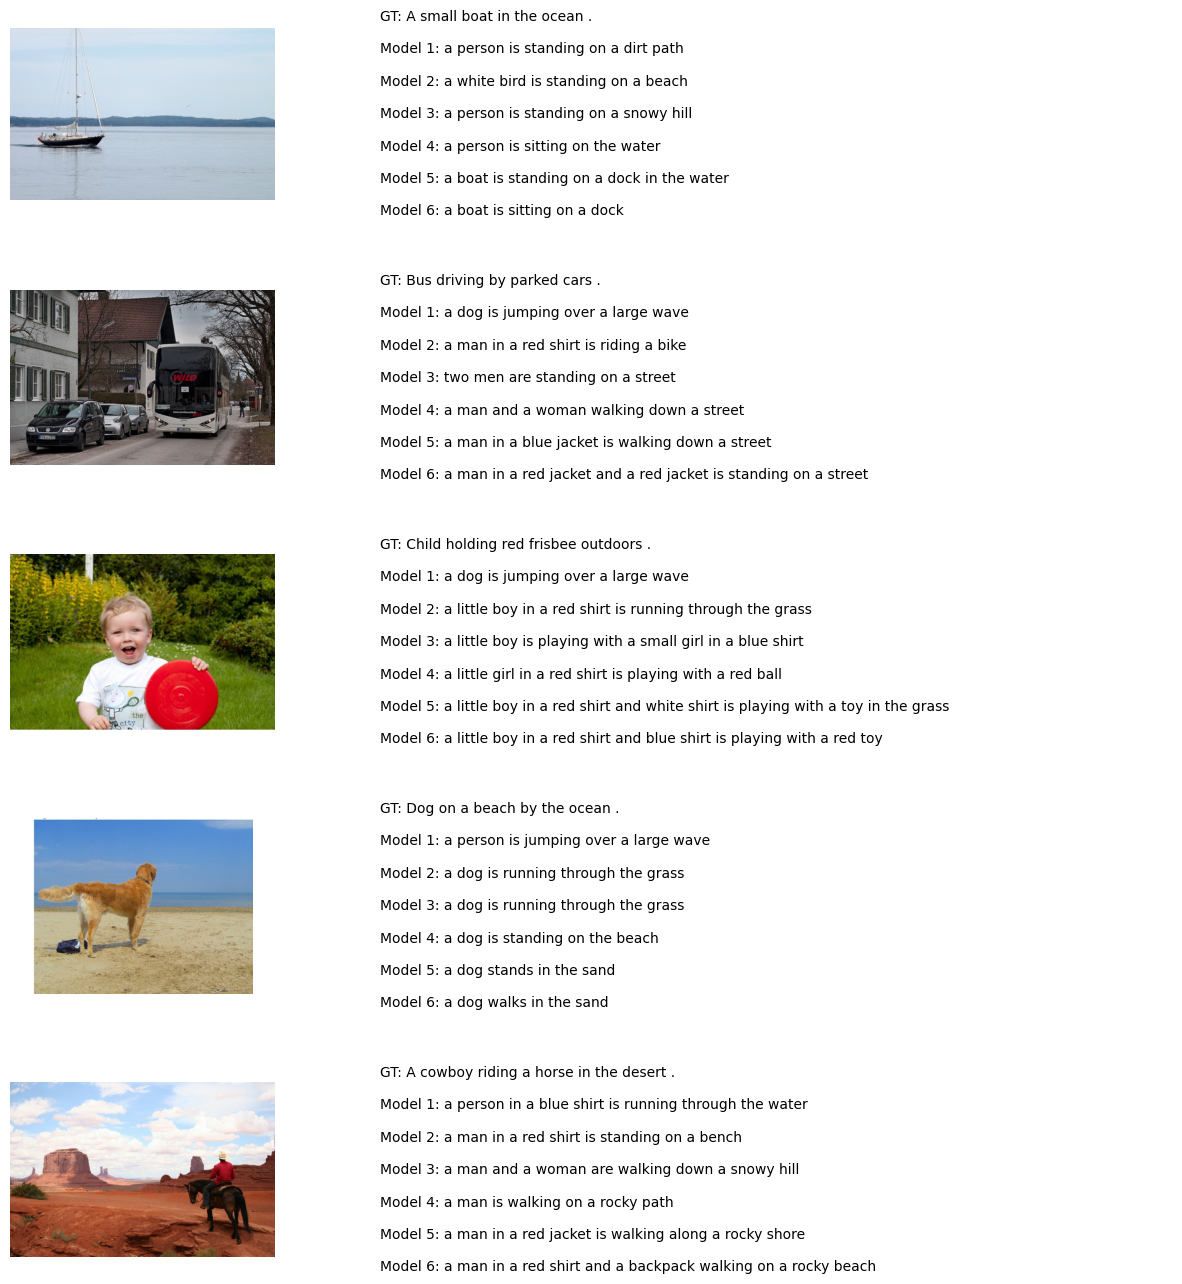

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.gridspec import GridSpec

test_caption_path = "flickr8k/test_examples/test_captions.txt"
model_path = 'report_utils/generate_caption/'
model_paths = [
    model_path+"model_1_generate_captions.txt",
    model_path+"model_2_generate_captions.txt",
    model_path+"model_3_generate_captions.txt",
    model_path+"model_4_generate_captions.txt",
    model_path+"model_5_128_4_generate_captions.txt",
    model_path+"model_6_128_2_8_generate_captions.txt",
]
image_dir = "flickr8k/test_examples/"

test_captions = pd.read_csv(test_caption_path)
test_captions_dict = dict(zip(test_captions['image'], test_captions['caption']))

model_captions = []
for model_path in model_paths:
    model_caption = pd.read_csv(model_path)
    model_captions.append(dict(zip(model_caption['image'], model_caption['caption'])))

fig = plt.figure(figsize=(15, 16))
outer_grid = GridSpec(len(test_captions), 2, width_ratios=[1, 3])

for idx, (image_name, gt_caption) in enumerate(test_captions_dict.items()):
    img_path = f"{image_dir}/{image_name}"
    img = mpimg.imread(img_path)
    
    ax_img = plt.Subplot(fig, outer_grid[idx, 0])
    ax_img.imshow(img)
    ax_img.axis('off')
    fig.add_subplot(ax_img)
    
    ax_txt = plt.Subplot(fig, outer_grid[idx, 1])
    captions_text = [f"GT: {gt_caption}"]
    captions_text += [f"Model {i+1}: {model_captions[i].get(image_name, 'No caption')}" for i in range(len(model_captions))]
    ax_txt.text(0, 0.5, "\n\n".join(captions_text), fontsize=10, va='center')
    ax_txt.axis('off')
    fig.add_subplot(ax_txt)

plt.subplots_adjust(hspace=0.5)
plt.show()

### Analysis:

#### Model 1:

- Lowest BLEU scores across the board.
- Captions are unrelated to the images (e.g., "a person is standing on a dirt path" for a boat in the ocean).

#### Model 2:

- Slightly better BLEU scores than Model 1.
- Captions are still largely incorrect, but occasionally closer to the context (e.g., "a man in a red shirt is riding a bike" for bus driving by parked cars).

#### Models 3 to 6:

- Higher BLEU scores, generally improving as the scores increase.
- Captions progressively become more accurate and contextually appropriate (e.g., "a boat is sitting on a dock" for the boat image, "a man and a woman walking down a street" for the bus image).

### Conclusion:

> There is a clear correlation between higher BLEU scores and the quality of generated captions. Models with higher BLEU scores tend to produce captions that are more accurate and relevant to the given images. Conversely, models with lower BLEU scores produce captions that are less accurate and often unrelated to the content of the images, which suggests that BLEU scores are a useful metric for evaluating the performance of image captioning models in terms of generation quality.

## Model 4

### Justify your idea of a different scheme for conditioning the decoder on the image encoding.

### What have you tried? What works and what does not?

> When showing the BLEU Scores I mentioned that I used two types of model_4, one is model_4_CLS_as_LSTM_initial_status , the other is model_4_CLS_condition_at_every_step .
> 
> model_4_CLS_condition_at_every_step uses encoded_image to initialise the decoder's hidden state. Doing so allows the decoder to implicitly include information about the image as it generates each word. This approach simplifies the model because the decoder does not need to distinguish whether the input is image encoded or text labelled. But the problem is that the final result is not very good, even similar to RNN.
> 
> So I designed model_4_CLS_condition_at_every_step. its using image coding at every time step of the decoder to fuse with the embedding vectors of the current input by concatenation before inputting it into the LSTM. This approach allows the continuous incorporation of image information into the text generation process during the decoding process. Experiments show that this approach performs reasonably well, and outperforms model 3, the original LSTM, on BLEU_3 and BLEU_4. The performance on BLEU_1 and 2 is also similar.
> 
> I also designed image_encoding to use the attention mechanism to condition text generation, but this is very similar to what models 5 and 6 do, so I didn't train it.
> 
> Another idea is to use the CLIP model to convert image_encoding to text_encoding and then use text_encoding to condition text generation. I think this is the best because text_encoding is much closer to the text features in the feature space, making condition easier. But this requires introducing additional pre-trained models, and the assignment doesn't allow submitting model weights, so I didn't implement that either.

## Model 5

### Describe how you conditioned the transformer on the image encoding. 

> The fifth question was interesting in that it required the use of a TransformerEncoder to solve the problem. In fact, it is generally mentioned to do condition in transformer, the decoder part is used because there is cross attention available.
> 
> My idea of solving the problem is, firstly encoded_image is still used as the first input of embedding. the input and output dimensions of TransformerEncoder are kept the same, so I move the original caption one place to the right as ground_truth to train the network. But the most important thing is to apply the mask. the fastest way to do this is to apply the mask directly on the attention matrix after calculating the QK, and set the upper right corner all the way to negative infinity.
> 
> The mask is so important that I tested the performance of the model without it, and the output was full of repetitions of the most important one or two words. This is because the mod shouldn't be able to predict the next word without seeing the word after it.

### What is the key difference between transformers and RNNs that gives you a performance boost?

> The key difference is that transformers can handle Long-Range Dependencies, but RNNs face Vanishing Gradient Problem and Memory Limitation. In model 4, the RNNs don't perform well even though I input encoded_image in each layer. Apparently it is very underpowered in handling this aspect of long distance dependencies. 

## Model 6

### Visualize the attention maps of the generated tokens (words) to the image tokens for all test images to show which pixels the generator pays attention to when predicting the next token.

In [ ]:
# generate attention map and save them in report_utils/generate_caption, you do not need to run this.
! python report_utils/attention_map.py --device-id=0 --config-file-path=./configs/config_model_6.yaml \
--experiment-name=model_6 --num-epochs=1 --no-log